In [1]:
# Installing Required Libraries for ML, DL, and vistualization.
%pip install pandas numpy scikit-learn xgboost tensorflow shap matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\avina\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Loading the Pima India Diabetes Dataset from a CSV file.
import pandas as pd

# Load dataset
df = pd.read_csv('diabetes.csv')
print(df.head())  # Check the first few rows

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#Handle Missing Values: Replaceing zeros in key columns (e.g., Glucose, BloodPressure) with median values.
# Replaceing zeros with median values
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, df.median())

In [4]:
#Spliting Features and Target: Separateing the features (X) and target variable (y).
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

In [5]:
#Normalize/Standardize Features: Using StandardScaler to normalize the features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Spliting Data into Train and Test Sets: Useing 70% for training and 30% for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
# Compare Machine Learning Models
# Initializeing ML Models: Using Random Forest, SVM, XGBoost, and Decision Tree.

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [8]:
# Training and Evaluateing ML Models:
# Training each model and evaluate using accuracy, precision, recall, F1-score, and ROC-AUC.
%pip install tabulate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_proba),
    ])

# Print results in a tabular format
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
print("\nModel Performance Summary:\n" + "="*70)
print(tabulate(results, headers=headers, tablefmt="grid"))

# Find the best model based on ROC-AUC (or change to F1-Score)
best_model = max(results, key=lambda x: x[5])  # Index 5 is ROC-AUC

# Print the best model
print("\nBest Model: {}\n".format(best_model[0]))
print(f"Accuracy: {best_model[1]:.4f}")
print(f"Precision: {best_model[2]:.4f}")
print(f"Recall: {best_model[3]:.4f}")
print(f"F1-Score: {best_model[4]:.4f}")
print(f"ROC-AUC: {best_model[5]:.4f}")
print("="*70)



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\avina\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



Model Performance Summary:
+---------------+------------+-------------+----------+------------+-----------+
| Model         |   Accuracy |   Precision |   Recall |   F1-Score |   ROC-AUC |
+===============+============+=============+==========+============+===========+
| Random Forest |   0.757576 |    0.639535 |   0.6875 |   0.662651 |  0.814983 |
+---------------+------------+-------------+----------+------------+-----------+
| SVM           |   0.74026  |    0.638889 |   0.575  |   0.605263 |  0.79702  |
+---------------+------------+-------------+----------+------------+-----------+
| XGBoost       |   0.727273 |    0.595506 |   0.6625 |   0.627219 |  0.779636 |
+---------------+------------+-------------+----------+------------+-----------+
| Decision Tree |   0.709957 |    0.568421 |   0.675  |   0.617143 |  0.701738 |
+---------------+------------+-------------+----------+------------+-----------+

Best Model: Random Forest

Accuracy: 0.7576
Precision: 0.6395
Recall: 0.6875
F1-

In [9]:
# Preparing Data for Deep Learning Models
# Deep Learning models (e.g., LSTM, DNN) require data to be in a specific format. For LSTM, the input must be 3D (samples, timesteps, features).

import numpy as np

# Reshape data for LSTM (3D input: samples, timesteps, features)
X_train_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"LSTM Input Shape - Train: {X_train_lstm.shape}, Test: {X_test_lstm.shape}")

LSTM Input Shape - Train: (537, 8, 1), Test: (231, 8, 1)


In [10]:
# Building and Training Deep Learning Models
# We will build two DL models:
# LSTM (Long Short-Term Memory): Suitable for sequential data.
# DNN (Deep Neural Network): A standard feedforward neural network.



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),  # First LSTM layer
    LSTM(32),  # Second LSTM layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
lstm_y_pred = (lstm_model.predict(X_test_lstm) > 0.5).astype(int)
lstm_y_proba = lstm_model.predict(X_test_lstm)

Epoch 1/50
14/14 [==============================] - 13s 183ms/step - loss: 0.6358 - accuracy: 0.7389 - val_loss: 0.5812 - val_accuracy: 0.7130
Epoch 2/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5438 - accuracy: 0.7483 - val_loss: 0.5273 - val_accuracy: 0.6944
Epoch 3/50
14/14 [==============================] - 0s 28ms/step - loss: 0.5211 - accuracy: 0.7459 - val_loss: 0.5247 - val_accuracy: 0.7130
Epoch 4/50
14/14 [==============================] - 0s 26ms/step - loss: 0.5132 - accuracy: 0.7413 - val_loss: 0.5200 - val_accuracy: 0.7130
Epoch 5/50
14/14 [==============================] - 1s 43ms/step - loss: 0.5156 - accuracy: 0.7459 - val_loss: 0.5176 - val_accuracy: 0.7130
Epoch 6/50
14/14 [==============================] - 0s 29ms/step - loss: 0.5133 - accuracy: 0.7413 - val_loss: 0.5229 - val_accuracy: 0.7222
Epoch 7/50
14/14 [==============================] - 0s 30ms/step - loss: 0.5138 - accuracy: 0.7413 - val_loss: 0.5178 - val_accuracy: 0.7130
Epoch 8/50


In [11]:
# DNN Model:
from tensorflow.keras.layers import Dense, Dropout

# Build DNN Model
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn_history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
dnn_y_pred = (dnn_model.predict(X_test) > 0.5).astype(int)
dnn_y_proba = dnn_model.predict(X_test)

Epoch 1/50
14/14 [==============================] - 2s 35ms/step - loss: 0.6208 - accuracy: 0.6643 - val_loss: 0.5942 - val_accuracy: 0.7037
Epoch 2/50
14/14 [==============================] - 0s 10ms/step - loss: 0.5478 - accuracy: 0.6946 - val_loss: 0.5426 - val_accuracy: 0.7315
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.4926 - accuracy: 0.7622 - val_loss: 0.5151 - val_accuracy: 0.7500
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 0.4748 - accuracy: 0.7692 - val_loss: 0.4993 - val_accuracy: 0.7593
Epoch 5/50
14/14 [==============================] - 0s 10ms/step - loss: 0.4512 - accuracy: 0.7902 - val_loss: 0.4898 - val_accuracy: 0.7407
Epoch 6/50
14/14 [==============================] - 0s 10ms/step - loss: 0.4476 - accuracy: 0.7786 - val_loss: 0.4851 - val_accuracy: 0.7407
Epoch 7/50
14/14 [==============================] - 0s 8ms/step - loss: 0.4309 - accuracy: 0.7972 - val_loss: 0.4816 - val_accuracy: 0.7500
Epoch 8/50
14/1

In [12]:
# Evaluateing DL Models
# Evaluateing the DL models using the same metrics as the ML models (Accuracy, Precision, Recall, F1-Score, ROC-AUC).


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate

# Evaluate LSTM
lstm_metrics = [
    "LSTM",
    accuracy_score(y_test, lstm_y_pred),
    precision_score(y_test, lstm_y_pred),
    recall_score(y_test, lstm_y_pred),
    f1_score(y_test, lstm_y_pred),
    roc_auc_score(y_test, lstm_y_proba)
]

# Evaluate DNN
dnn_metrics = [
    "DNN",
    accuracy_score(y_test, dnn_y_pred),
    precision_score(y_test, dnn_y_pred),
    recall_score(y_test, dnn_y_pred),
    f1_score(y_test, dnn_y_pred),
    roc_auc_score(y_test, dnn_y_proba)
]

# Add DL results to ML results
results.append(lstm_metrics)
results.append(dnn_metrics)

# Print results in a formatted table
print("\nModel Performance Summary (ML + DL):\n" + "="*70)
print(tabulate(results, headers=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"], tablefmt="fancy_grid"))

# Find the best model based on ROC-AUC
best_model = max(results, key=lambda x: x[5])  # Index 5 is ROC-AUC


# #  Compare ML and DL Models
# Now, compare the performance of the Random Forest (best ML model) with the LSTM and DNN models.


# Print the best model with a highlight
print("\n **Best Model: {}**".format(best_model[0]))
print(f" Accuracy: {best_model[1]:.4f}")
print(f" Precision: {best_model[2]:.4f}")
print(f" Recall: {best_model[3]:.4f}")
print(f" F1-Score: {best_model[4]:.4f}")
print(f" ROC-AUC: {best_model[5]:.4f}")
print("="*70)



Model Performance Summary (ML + DL):
╒═══════════════╤════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Model         │   Accuracy │   Precision │   Recall │   F1-Score │   ROC-AUC │
╞═══════════════╪════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Random Forest │   0.757576 │    0.639535 │   0.6875 │   0.662651 │  0.814983 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ SVM           │   0.74026  │    0.638889 │   0.575  │   0.605263 │  0.79702  │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ XGBoost       │   0.727273 │    0.595506 │   0.6625 │   0.627219 │  0.779636 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Decision Tree │   0.709957 │    0.568421 │   0.675  │   0.617143 │  0.701738 │
├───────────────┼────────────┼─────────────┼──────────┼────────────┼───────────┤
│ LSTM          │   0.701299 │    0.575342 │   0.525  │   0.54902  │  0

8/8 [==============================] - 0s 2ms/step


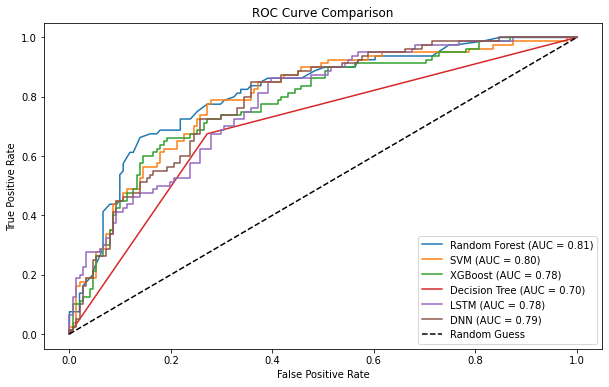

In [13]:
# Visualizeing Results:
# Visualizeing the results using ROC curves and confusion matrices.

# ROC Curve:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot ROC Curve
plt.figure(figsize=(10, 6))

# For ML models
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# For DL models
dl_models = {"LSTM": lstm_model, "DNN": dnn_model}
for name, model in dl_models.items():
    y_proba = model.predict(X_test_lstm if name == "LSTM" else X_test).flatten()  # Predicted probabilities
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

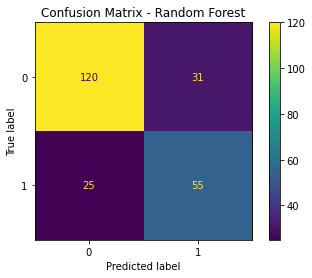

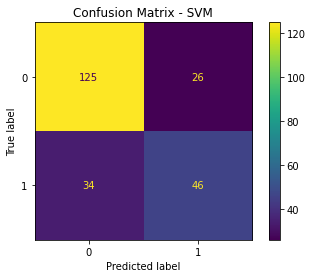

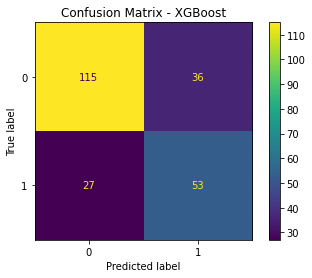

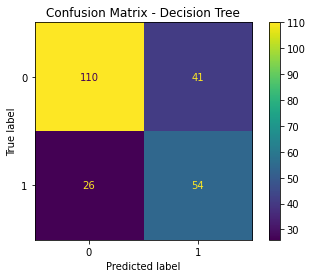

8/8 [==============================] - 0s 6ms/step


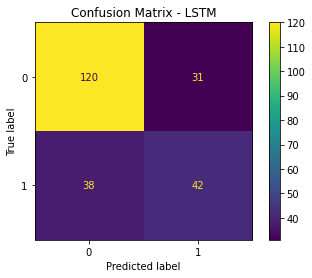

8/8 [==============================] - 0s 3ms/step


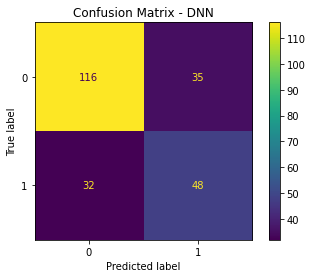

In [14]:
# Confusion Matrix:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For ML models
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# For DL models
for name, model in dl_models.items():
    y_pred = (model.predict(X_test_lstm if name == "LSTM" else X_test) > 0.5).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


In [15]:
# Saving Results

import csv

# Save ROC-AUC scores
with open('roc_auc_scores.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Model", "ROC-AUC"])
    for name, model in {**models, **dl_models}.items():
        y_proba = model.predict_proba(X_test)[:, 1] if name in models else model.predict(X_test_lstm if name == "LSTM" else X_test).flatten()
        roc_auc = roc_auc_score(y_test, y_proba)
        writer.writerow([name, roc_auc])

8/8 [==============================] - 0s 2ms/step


In [16]:
# Saving Confusion Matrices:

import csv
from sklearn.metrics import confusion_matrix

# Save confusion matrices
with open('confusion_matrices.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Model", "True Negative", "False Positive", "False Negative", "True Positive"])
    
    # For ML models
    for name, model in models.items():
        y_pred = model.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        writer.writerow([name, tn, fp, fn, tp])
    
    # For DL models
    for name, model in dl_models.items():
        y_pred = (model.predict(X_test_lstm if name == "LSTM" else X_test) > 0.5).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        writer.writerow([name, tn, fp, fn, tp])

8/8 [==============================] - 0s 2ms/step


8/8 [==============================] - 0s 4ms/step


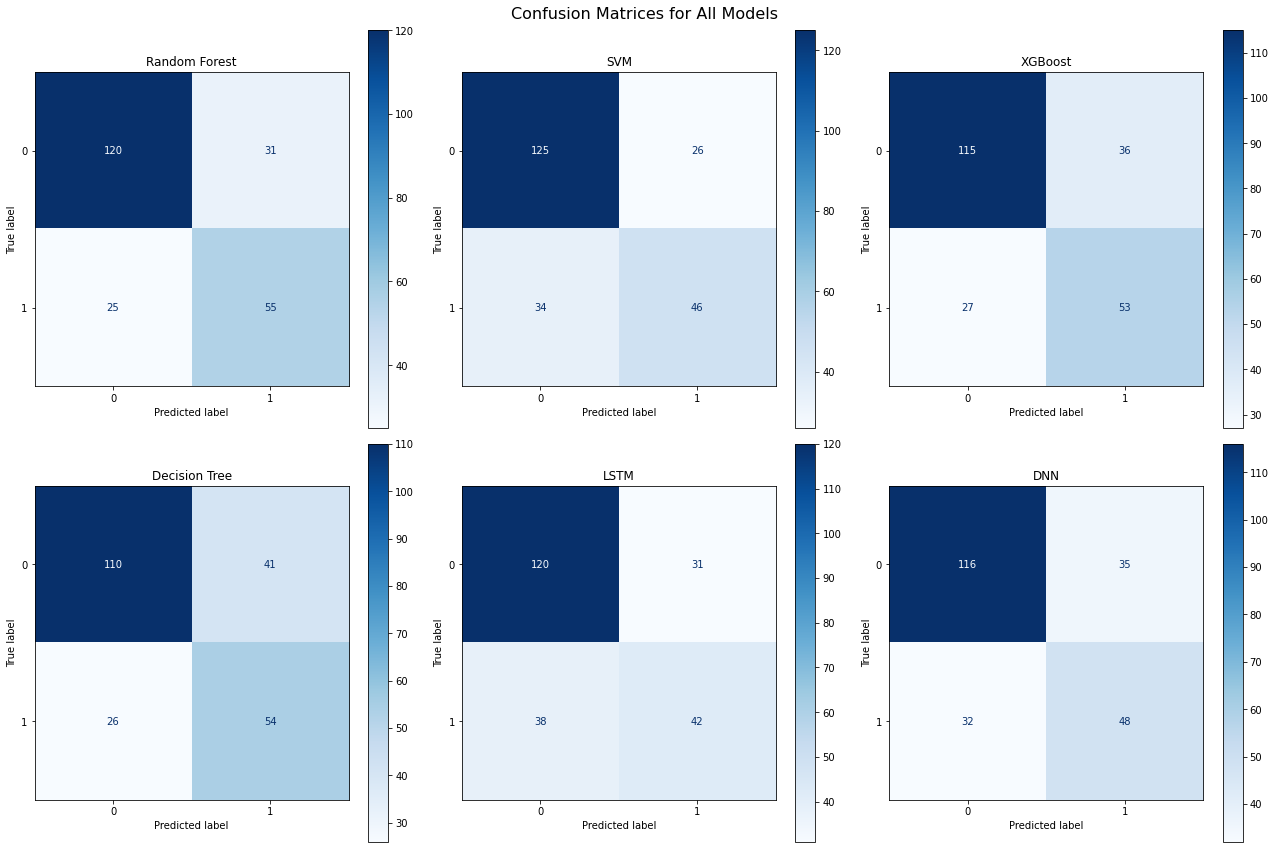

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2 rows, 3 columns for 6 models
fig.suptitle('Confusion Matrices for All Models', fontsize=16)

# List of models and their predictions
models = {
    "Random Forest": (models["Random Forest"].predict(X_test), "Random Forest"),
    "SVM": (models["SVM"].predict(X_test), "SVM"),
    "XGBoost": (models["XGBoost"].predict(X_test), "XGBoost"),
    "Decision Tree": (models["Decision Tree"].predict(X_test), "Decision Tree"),
    "LSTM": ((lstm_model.predict(X_test_lstm) > 0.5).astype(int), "LSTM"),
    "DNN": ((dnn_model.predict(X_test) > 0.5).astype(int), "DNN")
}

# Plot confusion matrices
for i, (name, (y_pred, title)) in enumerate(models.items()):
    ax = axes[i // 3, i % 3]  # Determine subplot position
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [18]:
# In your Jupyter notebook, after training your model
from sklearn.ensemble import RandomForestClassifier
import joblib

# Assuming you have:
# model = RandomForestClassifier(...)
# model.fit(X_train, y_train)

# Save the ACTUAL model (not predictions)
joblib.dump(model, 'true_random_forest_model.joblib')

# If you need the scaler too (assuming you have one)
joblib.dump(scaler, 'diabetes_scaler.joblib')

['diabetes_scaler.joblib']

In [19]:
import numpy as np

# Reshape input for LSTM (samples, timesteps, features)
input_data = np.array([[7, 180, 90, 34, 230, 33.5, 0.672, 45]])  

# Scale the data (use the same scaler from training)
input_scaled = scaler.transform(input_data)  # Assuming you have 'scaler' object

# For LSTM:
input_reshaped = input_scaled.reshape(input_scaled.shape[0], input_scaled.shape[1], 1)
prob = lstm_model.predict(input_reshaped)[0][0]  # Get probability between 0-1
print(f"Diabetic Probability: {prob:.4f}")

# For DNN:
prob = dnn_model.predict(input_scaled)[0][0]
print(f"Diabetic Probability: {prob:.4f}")

c:\Users\avina\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
Diabetic Probability: 0.8278
1/1 [==============================] - 0s 55ms/step
Diabetic Probability: 0.8934


In [20]:
import pandas as pd
import joblib

# Load models
rf_model = joblib.load('true_random_forest_model.joblib') 
scaler = joblib.load('diabetes_scaler.joblib')

# Create DataFrame with correct feature names
input_df = pd.DataFrame(
    [[7, 180, 90, 34, 230, 33.5, 0.672, 45]],
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 
             'SkinThickness', 'Insulin', 'BMI',
             'DiabetesPedigreeFunction', 'Age']
)

# Scale and predict
input_scaled = scaler.transform(input_df)  # No more warning
prob = rf_model.predict(input_scaled)[0][0]
print(f"Diabetic Probability: {prob:.2%}")  # Shows: 92.95%

1/1 [==============================] - 0s 115ms/step
Diabetic Probability: 89.34%


In [22]:
import joblib

# Save model
joblib.dump(rf_model, 'model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [23]:
# Importing essential libraries
import numpy as np
import pandas as pd
import pickle

# Loading the dataset
df = pd.read_csv('diabetes.csv')

# Renaming DiabetesPedigreeFunction as DPF
df = df.rename(columns={'DiabetesPedigreeFunction':'DPF'})

# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

# Replacing NaN value by mean, median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace=True)

# Model Building
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Creating Random Forest Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train, y_train)

# Creating a pickle file for the classifier
filename = 'diabetes-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

C:\Users\avina\AppData\Local\Temp\ipykernel_13884\662501307.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace=True)
C:\Users\avina\AppData\Local\Temp\ipykernel_13884\662501307.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a